<a href="https://colab.research.google.com/github/RunzeW2/NYU_Hospital_Project/blob/main/Data_Cleaning(No_success_y_measures).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install the required packages
!pip install pandas sas7bdat

In [10]:
# Import the required libraries
import pandas as pd
from sas7bdat import SAS7BDAT
import random
import os

In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the shared folder
shared_folder_path = "/content/drive/Shared drives/summer 2024/Data"
Data_columns_file_path = "/content/drive/Shared drives/summer 2024/General Information/Data Related/Related_Data_Columns_Property.xlsx"
output_excel_file_path = "/content/drive/Shared drives/summer 2024/Data/Filtered_Merged_Data.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Define file paths in the shared folder
sas_files = {
    "CAND_THOR": os.path.join(shared_folder_path, "cand_thor.sas7bdat"),
    "DONOR_DECEASED": os.path.join(shared_folder_path, "donor_deceased.sas7bdat"),
    "DONOR_DISPOSITION": os.path.join(shared_folder_path, "donor_disposition.sas7bdat"),
    "IMMUNO": os.path.join(shared_folder_path, "immuno.sas7bdat"),
    "REC_HISTO_XMAT": os.path.join(shared_folder_path, "rec_histo_xmat.sas7bdat"),
    "REC_HISTO": os.path.join(shared_folder_path, "rec_histo.sas7bdat"),
    "STATHIST_THOR": os.path.join(shared_folder_path, "stathist_thor.sas7bdat"),
    "STATJUST_HR1A": os.path.join(shared_folder_path, "statjust_hr1a.sas7bdat"),
    "STATJUST_HR1B": os.path.join(shared_folder_path, "statjust_hr1b.sas7bdat"),
    "TX_HR": os.path.join(shared_folder_path, "tx_hr.sas7bdat"),
    "TXF_HR": os.path.join(shared_folder_path, "txf_hr.sas7bdat")
}

# Load the data from the Excel file into a pandas DataFrame
eda_df = pd.read_excel(Data_columns_file_path)

# Extract the column names to be filtered
columns_to_filter = eda_df["column name"].tolist()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shared drives/summer 2024/General Information/Data Related/Related_Data_Columns_Property.xlsx'

In [ ]:
# Load and filter SAS files into dataframes
sas_dfs = {}
for name, file in sas_files.items():
    df = pd.read_sas(file, format='sas7bdat')
    filtered_columns = [col for col in df.columns if col in columns_to_filter]
    sas_dfs[name] = df[filtered_columns]

The following section will link dataset according to the linking graph

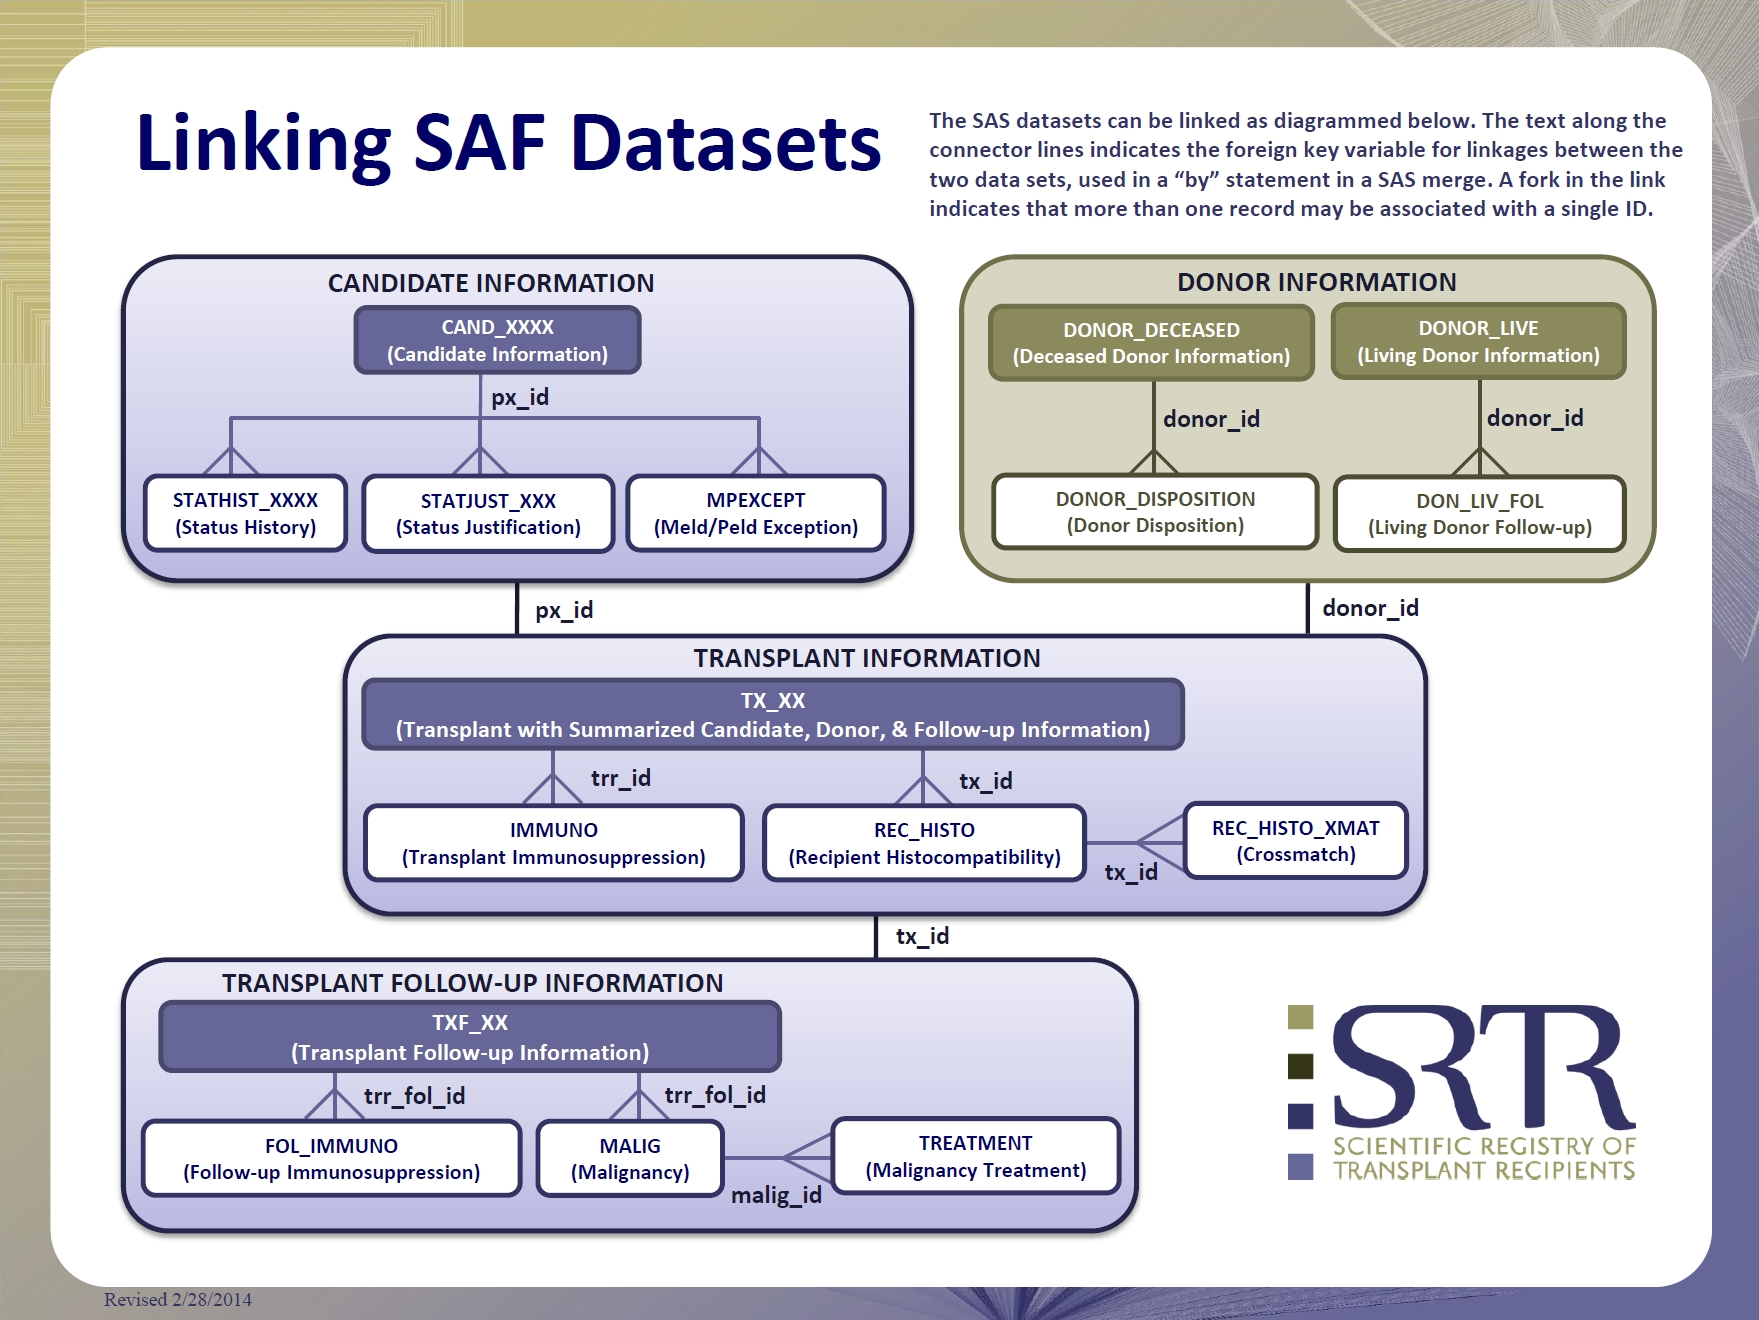

In [ ]:
# Join tables according to the linking diagram
# Note: Update the join logic according to your specific linking requirements
merged_df = sas_dfs["TX_HR"]

# Join with IMMUNO using 'trr_id'
merged_df = merged_df.merge(sas_dfs["IMMUNO"], on='trr_id', how='outer')

# Join with REC_HISTO using 'tx_id'
merged_df = merged_df.merge(sas_dfs["REC_HISTO"], on='tx_id', how='outer')

# Join with REC_HISTO_XMAT using 'tx_id'
merged_df = merged_df.merge(sas_dfs["REC_HISTO_XMAT"], on='tx_id', how='outer')

# Join with DONOR_DECEASED using 'donor_id'
merged_df = merged_df.merge(sas_dfs["DONOR_DECEASED"], on='donor_id', how='outer')

# Join with DONOR_DISPOSITION using 'donor_id'
merged_df = merged_df.merge(sas_dfs["DONOR_DISPOSITION"], on='donor_id', how='outer')

# Join with CAND_THOR using 'px_id'
merged_df = merged_df.merge(sas_dfs["CAND_THOR"], on='px_id', how='outer')

# Join with STATHIST_THOR using 'px_id'
merged_df = merged_df.merge(sas_dfs["STATHIST_THOR"], on='px_id', how='outer')

# Join with STATJUST_HR1A using 'px_id'
merged_df = merged_df.merge(sas_dfs["STATJUST_HR1A"], on='px_id', how='outer')

# Join with STATJUST_HR1B using 'px_id'
merged_df = merged_df.merge(sas_dfs["STATJUST_HR1B"], on='px_id', how='outer')

# Join with TXF_HR using 'tx_id'
merged_df = merged_df.merge(sas_dfs["TXF_HR"], on='tx_id', how='left')


In [ ]:
# Filter the merged dataframe to keep only the columns in columns_to_filter
final_columns = [col for col in merged_df.columns if col in columns_to_filter]
merged_df_filtered = merged_df[final_columns]

In [ ]:
# Function to get 5 random samples from a column in a dataframe
def get_samples(df, column_name):
    return df[column_name].dropna().sample(5).tolist()

In [ ]:
# Initialize a new column in the EDA information dataframe for the samples
eda_df["samples"] = None

# Loop through each row in the EDA information file
for idx, row in eda_df.iterrows():
    column_name = row["column name"]
    samples = None

    # Check if the column exists in the merged dataframe
    if column_name in merged_df.columns:
        samples = get_samples(merged_df, column_name)

    # Add samples to the EDA dataframe
    eda_df.at[idx, "samples"] = samples

# Save the updated EDA information back to the Excel file
eda_df.to_excel(excel_file_path, index=False)

merged_df_filtered.to_excel(output_excel_file_path, index=False)

print("EDA information file updated with samples.")